In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from desc.compute import surface_averages, surface_integrals
from desc.grid import *
from desc.plotting import plot_grid
import numpy as np

np.set_printoptions(precision=4, floatmode="fixed")

DESC version 0.5.1+118.g71ace73.dirty, using JAX backend, jax version=0.2.25, jaxlib version=0.1.76, dtype=float64
Using device: CPU, with 5.49 GB available memory


In [2]:
def test(grid, err_msg):
    area = surface_integrals(grid)
    np.testing.assert_allclose(area, 4 * np.pi ** 2, err_msg=err_msg)
    t = grid.nodes[:, 1]
    z = grid.nodes[:, 2] * grid.NFP
    f = (
        5
        + np.cos(t)
        - 0.5 * np.cos(z)
        + 3 * np.cos(t) * np.cos(z)
        - 2 * np.sin(z) * np.sin(t)
    )
    fig, ax = plt.subplots()
    ax.plot(t[grid.unique_theta_indices], f[grid.unique_theta_indices])
    avg = surface_averages(grid, f)
    np.testing.assert_allclose(avg, 5, err_msg=err_msg)

AssertionError: 
Not equal to tolerance rtol=1e-07, atol=0
g1
Mismatched elements: 7 / 7 (100%)
Max absolute difference: 3.5000
Max relative difference: 0.7000
 x: array([8.500000, 4.500000, 4.500000, 4.500000, 4.500000, 4.500000,
       4.500000])
 y: array(5)

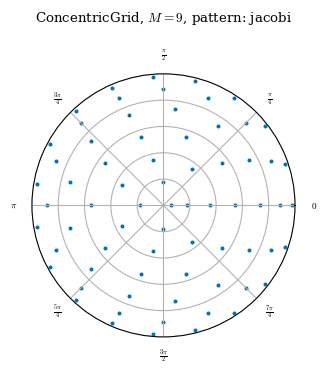

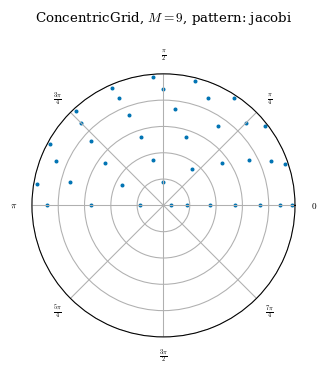

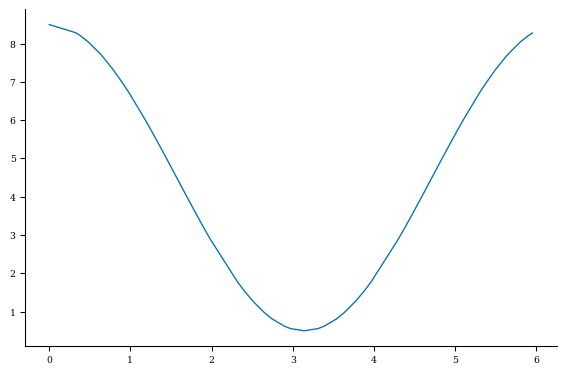

In [3]:
g1 = ConcentricGrid(
    L=12,
    M=round(1.5*6),
    N=round(1.5*0),
    rotation="cos"
)
g2 = ConcentricGrid(
    L=12,
    M=round(1.5*6),
    N=round(1.5*1),
    sym=True,
    rotation="cos"
)

plot_grid(g1)
plot_grid(g2)
test(g1, "g1")
test(g2, "g2")

In [ ]:
for i in range(g1.num_nodes):
    if i < g2.num_nodes:
        print(g1.nodes[i], "    ", g1.spacing[i, 1], g2.spacing[i, 1])
    else:
        print(g1.nodes[i], "    ", g1.spacing[i, 1])